# UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL
### PROGRAMA DE PÓS GRADUAÇÃO EM ENGENHARIA CIVIL (PPGEC)
### PEC00025 - INTRODUÇÃO À TEORIA DE VIBRAÇÕES

### GABRIEL ORSO GARCIA - 00275506

In [1]:
# importação de módulos básicos:
from MRPy import MRPy
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc

## 1 - Definição da Estrutura:

A estrutura a ser analisada no trabalho é uma viga de cobertura. A viga foi projetada para atravessar um vão de aproximadamente 25m, sustentando o telhado de um mercado - sua seção tranversal é retangular, de 30x120cm. A imagem abaixo apresenta as vistas superior e lateral da viga:

<img src="img/geometria_viga.png" alt="Vista superior e lateral" width="8000px"/>

Os cortes abaixo apresentam de maneira geral a geometria da seção transversal da viga, bem como as armaduras utilizadas:

<img src="img/cortes_viga.png" alt="Vista superior e lateral" width="1000px"/>

As barras indicadas pela numeração 4 possuem $\phi = 10mm$

As barras indicadas pela numeração 7 e 11 possuem $\phi = 16mm$

As barras indicadas pela numeração 1 possuem $\phi = 12.5mm$

As cordoalhas de protensão indicadas por N1 e N2 possuem $\phi = 15.2mm$

Com o objetivo de aliviar o peso próprio da viga, foi utilizado um preenchimento com EPS em seu interior. Esse preenchimento começa a 1,5 metros de distância das extremidades da viga e tem dimensões de 12x70cm. Estruturalmente, é como se a viga fosse de seção caixão, já que o EPS possui massa e módulo de elasticidade desprezíveis.

Por ser uma viga pré-fabricada, o sistema de protensão utilizado é o de pré-tração. Foram adotadas 10 cordoalhas com diâmetro de 15,2mm, com pré-alongamento de 7,76mm/m e força em cada uma delas de 21,74 tonf. A protensão foi escalonada em dois grupos de cordoalhas, o primeiro grupo - as 5 cordoalhas inferiores marcadas como N1 no corte - tem sua aderência nas extremidades da viga. Já o segundo grupo - as outras 5 cordoalhas, marcadas como N2 no corte - foram isoladas no momento da concretagem em seus primeiros 1,9 metros, de forma que sua aderência e atuação na viga só acontecem a partir desse ponto, em ambas as extremidades.

## 2 - Modelo Estrutural:

O modelo estrutural a ser utilizado será o de barra de viga. Os dados iniciais para caracterização do modelo são:

- Módulo de Elasticidade do Material
- Rigidez à Flexão da Seção. (Momento de Inércia)

Por se tratar de uma seção compósita (aço + concreto) o módulo de elasticidade a ser utilizado será o do concreto, calculado com auxílio da NBR6118:2014. Para o momento de inércia da seção, será utilizada uma rigidez equivalente, a fim de levar em consideração a diferença entre os módulos de elasticidade do Aço e do Concreto, resultando assim em uma rigidez EI mais próxima da realidade.

### 2.1 - Módulo de Elasticidade (E):

Segundo a NBR 6118:2014, o módulo de elasticidade tangente inicial do concreto pode ser estimado pela resistência característica do concreto à compressão, pela equação:

$$ E_{ci} = \alpha_e5600*\sqrt{f_{ck}} $$
(equação válida somente para $ f_{ck} <= 50 MPa $)

Onde $\alpha_e$ é um coeficiente que diz respeito ao agregado graúdo utilizado no concreto, sendo adotado como 1,0 neste caso. Como $f_{ck} = 40 MPa$ nesta obra, então:

$$ E_{ci} = 5600*\sqrt{40} = 35417 MPa $$

O módulo de deformação secante pode ser estimado pela expressão:

$$ E_{cs} = (0.8 + 0.2*(f_{ck}/80))*E_{ci} $$
$$ E_{cs} = (0.8 + 0.2*(40/50))*35417 = 31875 MPa $$


### 2.2 - Inércia Equivalente da Seção:

Para se considerar a inércia equivalente da seção, primeiro é necessário calcular a razão entre os módulos de elasticidade do aço e do concreto. Vamos chamar de $\alpha_p$ a relação para o aço CP-190RB (cordoalhas de protensão e $\alpha_s$ para o aço CA-50 (armadura passiva)

$$\alpha_p = \dfrac{205000}{31875} - 1 = 5.43$$


$$\alpha_s = \dfrac{200000}{31875} - 1 = 5.27$$

#### 2.2.1 - Cálculo do Centro de Gravidade da Seção:

Primeiramente, precisamos calcular a altura do centróide da seção, considerando a área das barras de aço como $\alpha_p$ e $\alpha_s$ maiores que a do concreto.

 - Seção de concreto armado, descontado do Eps:
 
$$A_c = 30*120 - 12*70 = 2760 cm^2$$

$$ y_{A_c} = \dfrac{120}{2} = 60 $$

 - Armadura Negativa (4 $\phi$ 16.0 mm):
 
 $$ A_{sn} = 4 * (\dfrac{\phi}{2})^2*\pi*\alpha_s = 42.38 cm^2$$
 $$ y_{A_{sn}} = 120 - 5 = 115cm $$
 
 - Armadura Positiva (2 $\phi$ 12.5 mm):
 
  $$ A_{sp} = 2 * (\dfrac{\phi}{2})^2*\pi*\alpha_s = 12.93 cm^2$$
  $$ y_{A_{sp}} = 5 cm $$
  
  - Armadura de Pele (12 $\phi$ 10.0 mm):
  
  $$ A_{pl} = 12 * (\dfrac{\phi}{2})^2*\pi*\alpha_s = 41.39 cm^2$$
  $$ y_{A_{pl}} = 62 cm $$
  
  - Armadura Ativa:
  
  $$ A_{p} = 10 * 1.43 *\alpha_p = 77.65 cm^2$$
  $$ y_{A_{p}} = 11.7 cm $$
  
  - Centroide:
  
  $$ y_g = \dfrac{2760*60 + 42.38*115 + 12.93*5 + 41.39*62+77.65*11.7}{2760+42.38+12.93+41.39+77.65} = 59.3 cm$$
  
#### 2.2.2 - Cálculo da Inércia:

A inércia a flexão da seção será calculada em referência ao centroide $y_g$ - através do teorema de steiner, somando-se as contribuições da seção de concreto e diversas armaduras:

 - Seção de concreto armado, descontado do Eps:
 
$$ I_c = \dfrac{30*120^3}{12} - \dfrac{12*70^3}{12} + 2760*(60-59.3)^2 = 3978352.4$$ 

 - Armadura Negativa (4 $\phi$ 16.0 mm):
 
$$ I_{A_{sn}} = 4* (\dfrac{\pi*\phi^4}{16})\alpha_s + (42.38)*(115-59.3)^2 = 131488.68 $$
 
 - Armadura Positiva (2 $\phi$ 12.5 mm):
 
$$ I_{A_{sp}} = 2* (\dfrac{\pi*\phi^4}{16})\alpha_s + (12.93)*(5-59.3)^2 = 38124.93 $$
  
  - Armadura de Pele (12 $\phi$ 10.0 mm):
  
$$ I_{A_{pl}} = 12*(\dfrac{\pi*\phi^4}{16})\alpha_s + 
2(\dfrac{\phi}{2})^2\pi\alpha_s(12-59.3)^2 +
2(\dfrac{\phi}{2})^2\pi\alpha_s(32-59.3)^2 +
2(\dfrac{\phi}{2})^2\pi\alpha_s(52-59.3)^2 +
2(\dfrac{\phi}{2})^2\pi\alpha_s(72-59.3)^2 +
2(\dfrac{\phi}{2})^2\pi\alpha_s(92-59.3)^2 +
2(\dfrac{\phi}{2})^2\pi\alpha_s(112-59.3)^2 = 57942.08
$$
  
  - Armadura Ativa:
  
$$ I_{A_p} = 10\alpha_p(\dfrac{\pi*\phi^4}{16})+(5*1.43\alpha_p)*(9.2-59.3)^2+(5*1.43\alpha_p)*(14.2-59.3)^2 = 176454.71 $$
  
  - Inércia Total Equivalente:
  
  $$ I_{eq} = 4382362.8 cm^4 $$
  

### 2.3 - Rigidez à Flexão da Viga:

Para simplificar o problema, a rigidez à flexão da viga, $EI$, será considerada constante ao longo de todo o vão, e é igual a:

$$ EI_{eq} = 4382362.8 cm^4* 3187.5kN/cm^2 = 1.396878143*10^{10} kNcm^2 $$

Apenas para comparação, a rigidez a flexão sem levar em conta as armaduras da seção seria:

$$ EI = (\dfrac{30*120^3}{12}-\dfrac{12*70^3}{12})*3187.5 = 1.26766875*10^{10} kNcm^2 $$

Ou seja: levar em consideração as armaduras no cálculo da rigidez à flexão do elemento levou a um aumento de aproximadamente 10% na mesma.

## 3 - Modelagem Numérico:

### 3.1 - Modelo Ftool:

A fim de extrair as rigidezes da estrutura em cada um dos elementos, a viga foi modelada no ftool. Para manter cada trecho de barra com comprimento exato e atender ao mínimo de 10 nós na simplificação, a viga foi dividida em trechos de 2,5m e 1,25m - tendo uma maior discretização próxima do centro.

A imagem abaixo apresenta o modelo no ftool:

<img src="img/modelo_ftool.png" alt="Modelo Ftool" width="8000px"/>

Ao modelo foram aplicadas as propriedades $I_{eq}$ e $E_{cs}$ calculadas anteriormente

Para cálculo dos coeficientes de elasticidade para a montagem da matriz de rigidez $H$, foram aplicadas cargas unitárias em cada um dos nós e os deslocamentos em todos os outros medidos, a matriz gerada está apresentada abaixo:

In [2]:
#Coeficientes de flexibilidade em m/N:
H = np.array([[3.020, 5.220, 6.525, 7.047, 7.049, 6.898, 6.607, 6.189, 5.034, 3.542, 1.827],
              [5.220, 9.545,12.267,13.423,13.483,13.236,12.710,11.931, 9.732, 6.861, 3.542],
              [6.525,12.267,16.443,18.456,18.687,18.456,17.806,16.779,13.758, 9.732, 5.034],
              [7.047,13.423,18.456,21.476,22.045,21.998,21.393,20.283,16.778,11.931, 6.189],
              [7.049,13.483,18.687,22.045,22.840,22.966,22.462,21.393,17.806,12.710, 6.607],
              [6.898,13.236,18.456,21.998,22.966,23.303,22.966,21.998,18.456,13.236, 6.898],
              [6.607,12.710,17.806,21.393,22.462,22.966,22.840,22.045,18.687,13.483, 7.049],
              [6.189,11.931,16.778,20.283,21.393,21.998,22.045,21.476,18.456,13.423, 7.047],
              [5.034, 9.732,13.758,16.779,17.806,18.456,18.687,18.456,16.443,12.267, 6.525],
              [3.542, 6.861, 9.732,11.931,12.710,13.236,13.483,13.423,12.267, 9.545, 5.220],
              [1.827, 3.542, 5.034, 6.189, 6.607, 6.898, 7.049, 7.047, 6.525, 5.220, 3.020]])*1e-7

print()

### 3.2 - Teste da Matriz de Flexibilidade:

Com o objetivo de testar a matriz de flexibilidade calculada anteriormente, foram aplicadas as cargas de peso próprio da estrutura (as mesmas utilizadas na matriz de massa - podem ser vistas no item 3.3 - multiplicadas pela aceleração da gravidade)

Ftool:

<img src="img/resultado_ftool.png" alt="Modelo Ftool" width="8000px"/>

In [3]:
#peso por metro da viga:
p_m = 2500*(1.2*0.3-0.7*0.12)
m1 = p_m*2.5
m2 = p_m*(1.25 + 1.25/2)
m3 = p_m*1.25

F = 10*np.array([-m1, -m1, -m1, -m2, -m3, -m3, -m3, -m2, -m1, -m1, -m1]).reshape(11,1)
u = np.matmul(H,F)
print("Deslocamento no nó central da treliça: {0:.5f}m (Matriz de Flexibilidade)".format(u[5][0]))

Deslocamento no nó central da treliça: -0.24977m (Matriz de Flexibilidade)


Portanto, pode-se concluir que a matriz foi corretamente montada. 

Após isso, a matriz de rigidez K da estrutura é calculada como a inversa da matriz de flexibilidade, e ambas são plotadas com auxilio do matplotlib para termos uma ideia de sua forma.

Deslocamento no nó central da treliça: -0.24977m (Matriz de Rigidez)


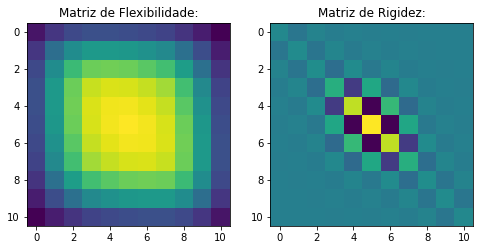

In [4]:
K = np.linalg.inv(H)
plt.figure(1, figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(H); plt.title('Matriz de Flexibilidade:');
plt.subplot(1,2,2); plt.imshow(K); plt.title('Matriz de Rigidez:');

u2 = sc.solve(K,F)
print("Deslocamento no nó central da treliça: {0:.5f}m (Matriz de Rigidez)".format(u2[5][0]))

A forma das matrizes está de acordo com o esperado.

### 3.3 - Matriz de Massa Concentrada:

Para a matriz de massa concentrada, foi utilizada a massa da viga e a área de influência de cada nó:

In [5]:
M = np.eye(11)
M[0][0]   = m1
M[1][1]   = m1
M[2][2]   = m1
M[3][3]   = m2
M[4][4]   = m3
M[5][5]   = m3
M[6][6]   = m3
M[7][7]   = m2
M[8][8]   = m1
M[9][9]   = m1
M[10][10] = m1

## 4 - Análise Dinâmica:

Através do problema de autovalores e autovetores, podemos calcular as frequências naturais da estrutura:

In [6]:
def vibration_modes(K, M):
    w2, Phi = sc.eig(K, M)
    iw  = w2.argsort()
    w2  = w2[iw]
    #print(np.real(w2))
    Phi = Phi[:,iw]
    wk  = np.sqrt(np.real(w2)) 
    fk  = wk/2/np.pi
    return fk, wk, Phi

In [7]:
fk, wk, Phi = vibration_modes(K,M)

print("----------------------------------")
print("Frequências Naturais da Estrutura:")
print("----------------------------------")
print("Modo de Vibração #01:   {0:2.2f} Hz".format(fk[ 0]))
print("Modo de Vibração #02:   {0:2.2f} Hz".format(fk[ 1]))
print("Modo de Vibração #03:  {0:2.2f} Hz ".format(fk[ 2]))
print("Modo de Vibração #04:  {0:2.2f} Hz ".format(fk[ 3]))
print("Modo de Vibração #05:  {0:2.2f} Hz ".format(fk[ 4]))
print("Modo de Vibração #06:  {0:2.2f} Hz ".format(fk[ 5]))
print("Modo de Vibração #07:  {0:2.2f} Hz ".format(fk[ 6]))
print("Modo de Vibração #08:  {0:2.2f} Hz ".format(fk[ 7]))
print("Modo de Vibração #09:  {0:2.2f} Hz ".format(fk[ 8]))
print("Modo de Vibração #10: {0:2.2f} Hz  ".format(fk[ 9]))
print("Modo de Vibração #11: {0:2.2f} Hz  ".format(fk[10]))

----------------------------------
Frequências Naturais da Estrutura:
----------------------------------
Modo de Vibração #01:   1.13 Hz
Modo de Vibração #02:   4.56 Hz
Modo de Vibração #03:  10.05 Hz 
Modo de Vibração #04:  18.25 Hz 
Modo de Vibração #05:  28.13 Hz 
Modo de Vibração #06:  39.31 Hz 
Modo de Vibração #07:  55.48 Hz 
Modo de Vibração #08:  63.94 Hz 
Modo de Vibração #09:  87.03 Hz 
Modo de Vibração #10: 152.52 Hz  
Modo de Vibração #11: 308.04 Hz  


Como a frequência natural do modo #01 ficou abaixo de 2Hz e acima de 0.2Hz, a estrutura está ok para ser analisada.

### 4.1 - Análise dos Modos de Vibração:

Abaixo estão representados graficamente os 11 modos de vibração calculados para a estrutura:

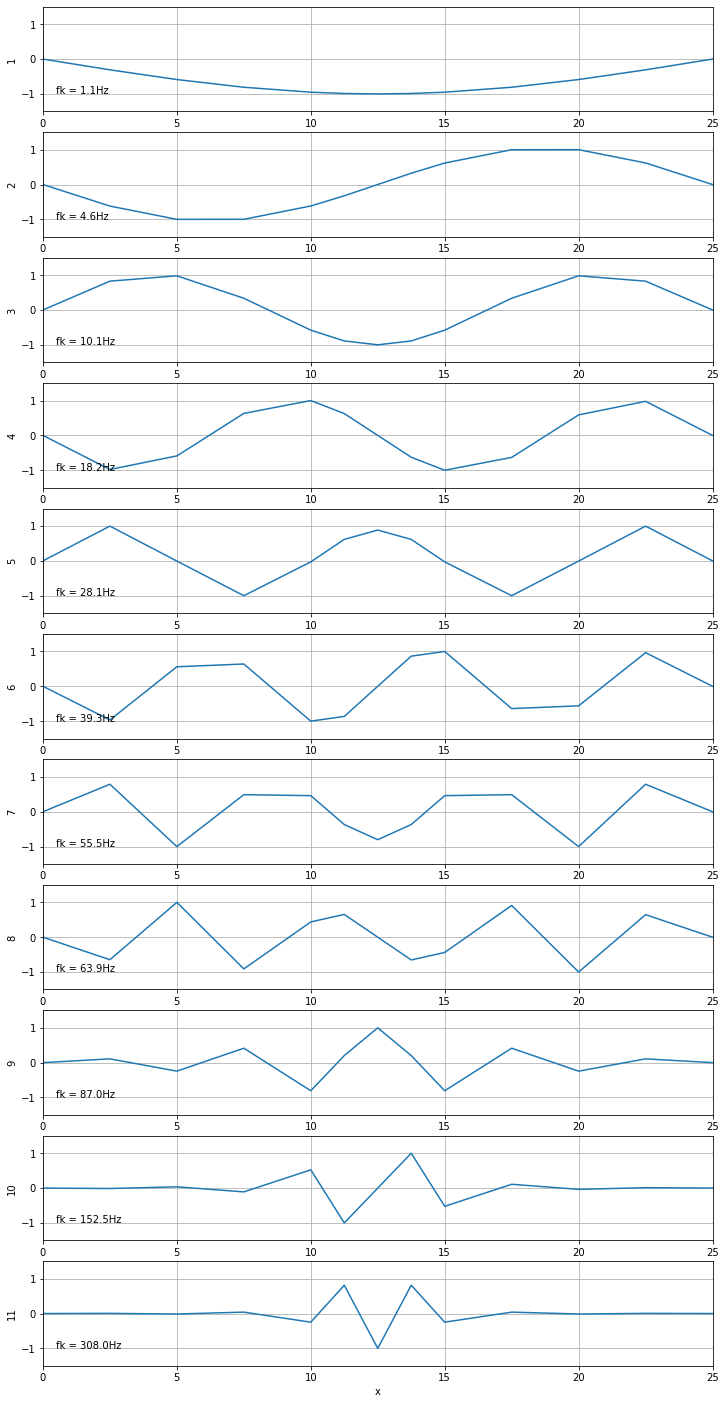

In [8]:
f1 = plt.figure(1, figsize=(12,10))
x  = np.array([0.00, 2.50, 5.00, 7.50, 10.00, 11.25, 12.50, 13.75, 15.00, 17.50, 20.00, 22.50, 25.00])

for k in range(11):
    qk = np.zeros(13)
    qk[1:-1] = Phi[:,k]
    qk /= np.max(np.abs(qk))
    
    f = plt.subplot(11,1,k+1)
    f.figure.set_figheight(25)
    plt.plot(x, qk)
    
    plt.xlim( 0.0, 25.0);
    plt.ylim(-1.5,  1.5);
    plt.ylabel(str(k+1));
    plt.text(0.5, -1, 'fk = {0:3.1f}Hz'.format(fk[k]));
    plt.grid(True)

plt.xlabel('x');

É importante ressaltar que devido a discretização maior no centro da viga, o modos de vibração #6 em diante parecem ter uma certa distorção na onda senoidal - provavelmente com um modelo melhor discretizado essas distorções não apareceriam.

## 5 - Coeficiente de Rayleigh:

Chutaremos o primeiro modo de vibração na forma da deformada da estrutura ao ser aplicada uma carga de $-1N$ em seu nó central. O cálculo é feito através da matriz de flexibilidade calculada anteriormente, multiplicada pelo vetor de cargas desejado:

In [9]:
F = np.array([0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0])
u1 = np.dot(H,F)

print("Vetor de deslocamentos para uma carga centrada de -1N:")
print(u1*100)
print("em centímetros [cm]")

Vmax = np.abs(u1[6]/2)
Tref = np.dot(u1.T,np.dot(M,u1))/2

f1 = np.sqrt(Vmax/Tref)/2/np.pi
print('\n\nFrequência Natural do Primeiro Modo:')
print('----------------------------------------')
print('From Rayleigh quotient:       {0:4.5f}Hz'.format(f1)) 
print('Calculated from eigenproblem: {0:4.5f}Hz'.format(fk[0]))
print('Estimation error:             {0:4.5f}% '.format(100*(f1 - fk[0])/fk[0]))

Vetor de deslocamentos para uma carga centrada de -1N:
[-6.8980e-05 -1.3236e-04 -1.8456e-04 -2.1998e-04 -2.2966e-04 -2.3303e-04
 -2.2966e-04 -2.1998e-04 -1.8456e-04 -1.3236e-04 -6.8980e-05]
em centímetros [cm]


Frequência Natural do Primeiro Modo:
----------------------------------------
From Rayleigh quotient:       1.12775Hz
Calculated from eigenproblem: 1.12819Hz
Estimation error:             -0.03913% 


## 6 - Resposta ao Impulso Unitário:
### 6.1 - Forças Nodais:

Será aplicado um impulso uniário no nó 6 (nó central da viga) para uma análise da resposta dinâmica do sistema:

Carga aplicada em cada um dos graus de liberdade:


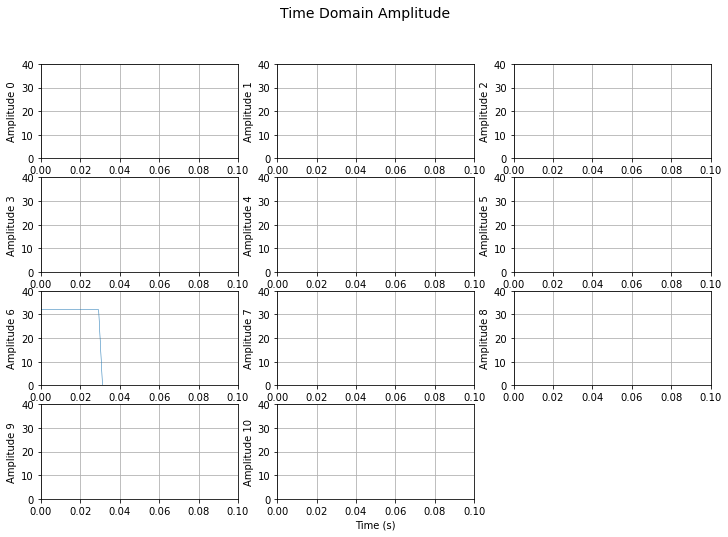

In [10]:
FG = np.zeros((11,20*512))

i0 = 0.05*512
FG[6,0:16] = 32

FG = MRPy(FG, fs=512)
FG.plot_time(axis_t=(0,0.1,0,40))

print("Carga aplicada em cada um dos graus de liberdade:")

Foi aplicada uma carga de 32N durante 0.03125 segundos.

### 6.2 - Cálculo da Matriz de Amortecimento:

Foi estipulado para calculo dessa matriz os coeficientes de amortecimento do primeiro e oitavo modos de vibração da estrutura como 1%

Coeficientes de Amortecimento:
------------------------------------------
Modo de vibração # 1: 1.00% - Fq:   1.13Hz
Modo de vibração # 2: 0.26% - Fq:   4.56Hz
Modo de vibração # 3: 0.14% - Fq:  10.05Hz
Modo de vibração # 4: 0.12% - Fq:  18.25Hz
Modo de vibração # 5: 0.13% - Fq:  28.13Hz
Modo de vibração # 6: 0.16% - Fq:  39.31Hz
Modo de vibração # 7: 0.20% - Fq:  55.48Hz
Modo de vibração # 8: 0.22% - Fq:  63.94Hz
Modo de vibração # 9: 0.29% - Fq:  87.03Hz
Modo de vibração #10: 0.50% - Fq: 152.52Hz
Modo de vibração #11: 1.00% - Fq: 308.04Hz


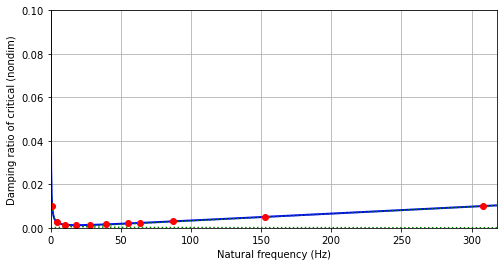

In [11]:
wki = wk[0];  zti = 0.01
wkj = wk[10];  ztj = 0.01

alpha = np.linalg.solve([[1/(2*wki), wki/2], 
                         [1/(2*wkj), wkj/2]], [zti, ztj])

ztM  = lambda fk: alpha[0]/(4*np.pi*fk)
ztK  = lambda fk: alpha[1]*np.pi*fk
ztMK = lambda fk: ztM(fk) + ztK(fk)
zk = ztMK(fk)


fk1 = wk/(2*np.pi)
fkx  = np.linspace(0.1, fk[10]+10, 2000)

plt.figure(1, figsize=(8,4))
plt.plot(fkx,  ztMK(fkx), 'b' , lw=2.0)
plt.plot(fkx,  ztM (fkx), 'g:', lw=1.5)
plt.plot(fkx,  ztK (fkx), 'g:', lw=1.5)
plt.plot(fk1, ztMK(fk1), 'ro')
plt.xlabel('Natural frequency (Hz)')
plt.ylabel('Damping ratio of critical (nondim)')
plt.axis([0, fk[10]+10, 0, 0.1])

plt.grid(True)

print("Coeficientes de Amortecimento:")
print("------------------------------------------")
for i in range(11):
    print("Modo de vibração #{0:2.0f}: {1:.2f}% - Fq: {2:6.2f}Hz".format(i+1,zk[i]*100,fk[i]))

### 6.3 - Forças Modais:

Sao obtidas multiplicando os carregamentos anteriormente apresentados por cada um dos modos de vibração (autovetores)

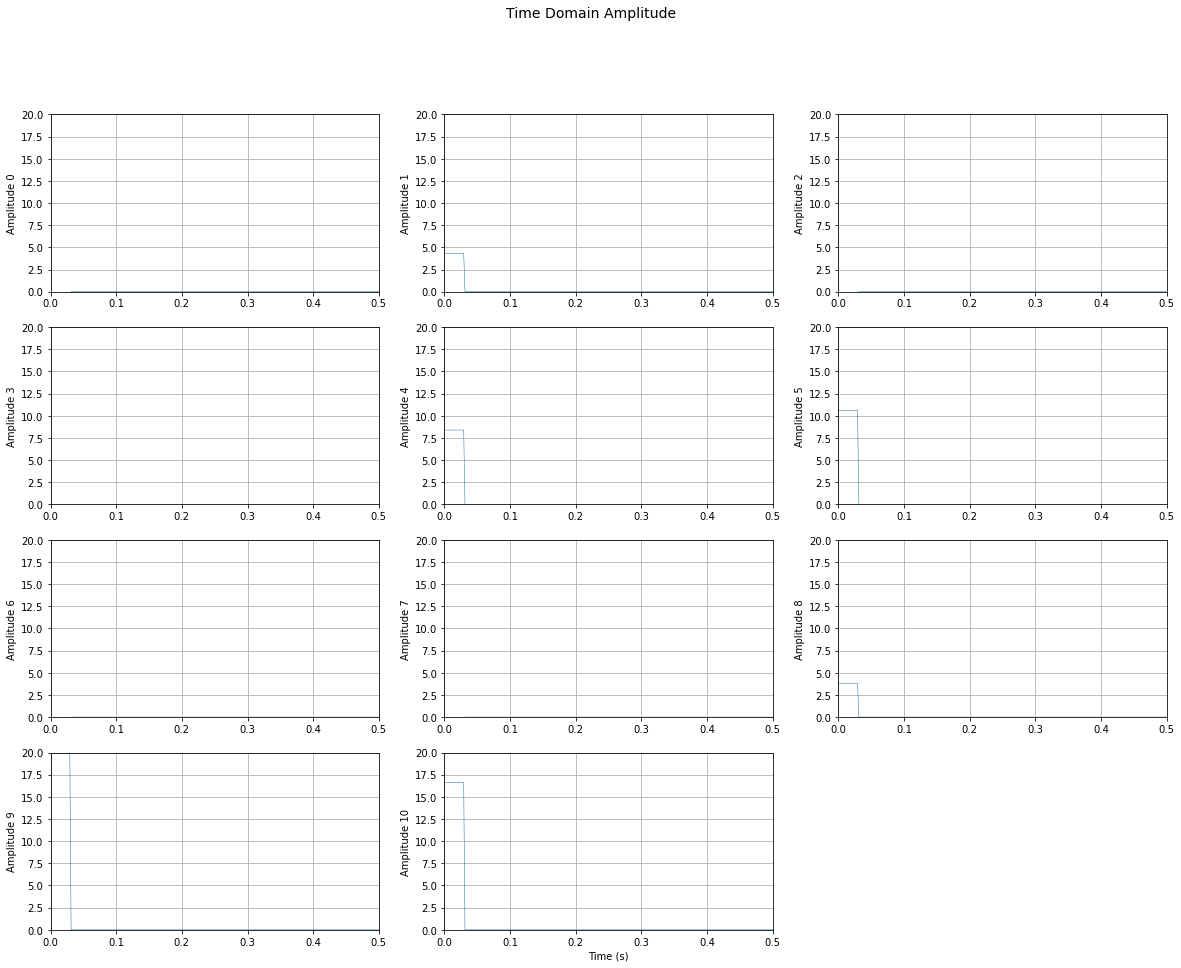

In [12]:
Mk = np.diag(M)
Kk = Mk*(wk**2)
Fk = MRPy(np.dot(Phi.T,FG), fs=FG.fs)
Fk.plot_time(axis_t=(0,0.5,0,20),figsize=(20,15))
print()

### 6.4 - Deslocamentos Nodais:

In [ ]:
print()
ak = MRPy(np.dot(np.diag(1/Mk), Fk), fs=Fk.fs)
uk = ak.sdof_Duhamel(fk,zk)
utot = MRPy(np.dot(Phi, uk), fs=uk.fs)
utot.plot_time(figsize=(20,15))

[[<matplotlib.lines.Line2D at 0x14eea71a9a0>],

Plotagem no domínio da frequência:

In [ ]:
utot.plot_freq(2,axis_f=(0,20,0,0.0000000001),figsize=(20,15))
print()

Podemos ver através desses gráficos que o sistema vibra majoritariamente no primeiro modo de vibração (1.13Hz).

## 7 - Carga Estática Equivalente:

In [ ]:
V = MRPy(uk*uk/2, fs=uk.fs).superpose(Kk)
V.plot_time()

In [ ]:
imax = np.argmax(V[0])
tmax = imax/uk.fs
umax = uk[:,imax]
print("Tempo com a maior energia potencial elástica: {0:1.2f}s".format(tmax))

In [ ]:
Mqk = np.dot(M,Phi)
Feq = np.zeros(umax.shape)

for k in range(11):
    Feq += (wk[k]**2)*umax[k]*Mqk[:,k]
    
ueq = np.linalg.solve(K,Feq)

print("Para os testes no ftool, os números serão multiplicados por 10000, por questões de arredondamento do Ftool:")
print("\nVetor de forças equivalentes:",Feq*1000)
print("\nVetor de deslocamentos equivalentes:",ueq*1000)

Comparação com os resultados do Ftool:

**Cargas aplicadas:**

<img src="img/forcaEstatica_Cargas.png" alt="Modelo Ftool" width="800px"/>

**Deslocamentos obtidos:**

<img src="img/forcaEstatica_Deslocamentos.png" alt="Modelo Ftool" width="800px"/>

O resultado obtido no ftool foi de 9.737mm contra 9.817mm calculado no python. Podemos atribuir essa diferença as cargas aplicadas, que foram arredondadas no Ftool conforme pode ser conferido na imagem.